# Hash Tablosu

1. <i>Hash tablosu veri yapısı, öğeleri anahtar/değer çiftlerinde saklar.</i>
<hr>
- <b>Anahtar:</b> Değerleri indekslemek için kullanılan benzersiz tamsayı <br>
- <b>Değer:</b> Anahtarlarla bağlantılı, ilişkili veriler.
<hr>

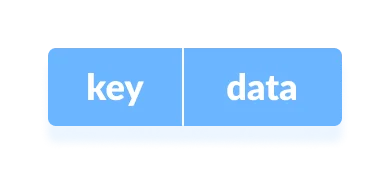

### Hashleme (Hash Fonksiyonu):
Bir hash tablosunda, anahtarlar kullanılarak yeni bir dizin işlenir. <br>Ve o anahtara karşılık gelen eleman dizinde saklanır. Bu işleme <b>hash</b> denir.
<hr>
- <i><b>k:</b></i> (key) anahtar olsun. <br>
- <i><b>h(x):</b></i> hash fonksiyonu olsun.
<hr>
* Burada h(k), k ile bağlantılı elemanı depolamak için bize yeni bir indeks verecektir.

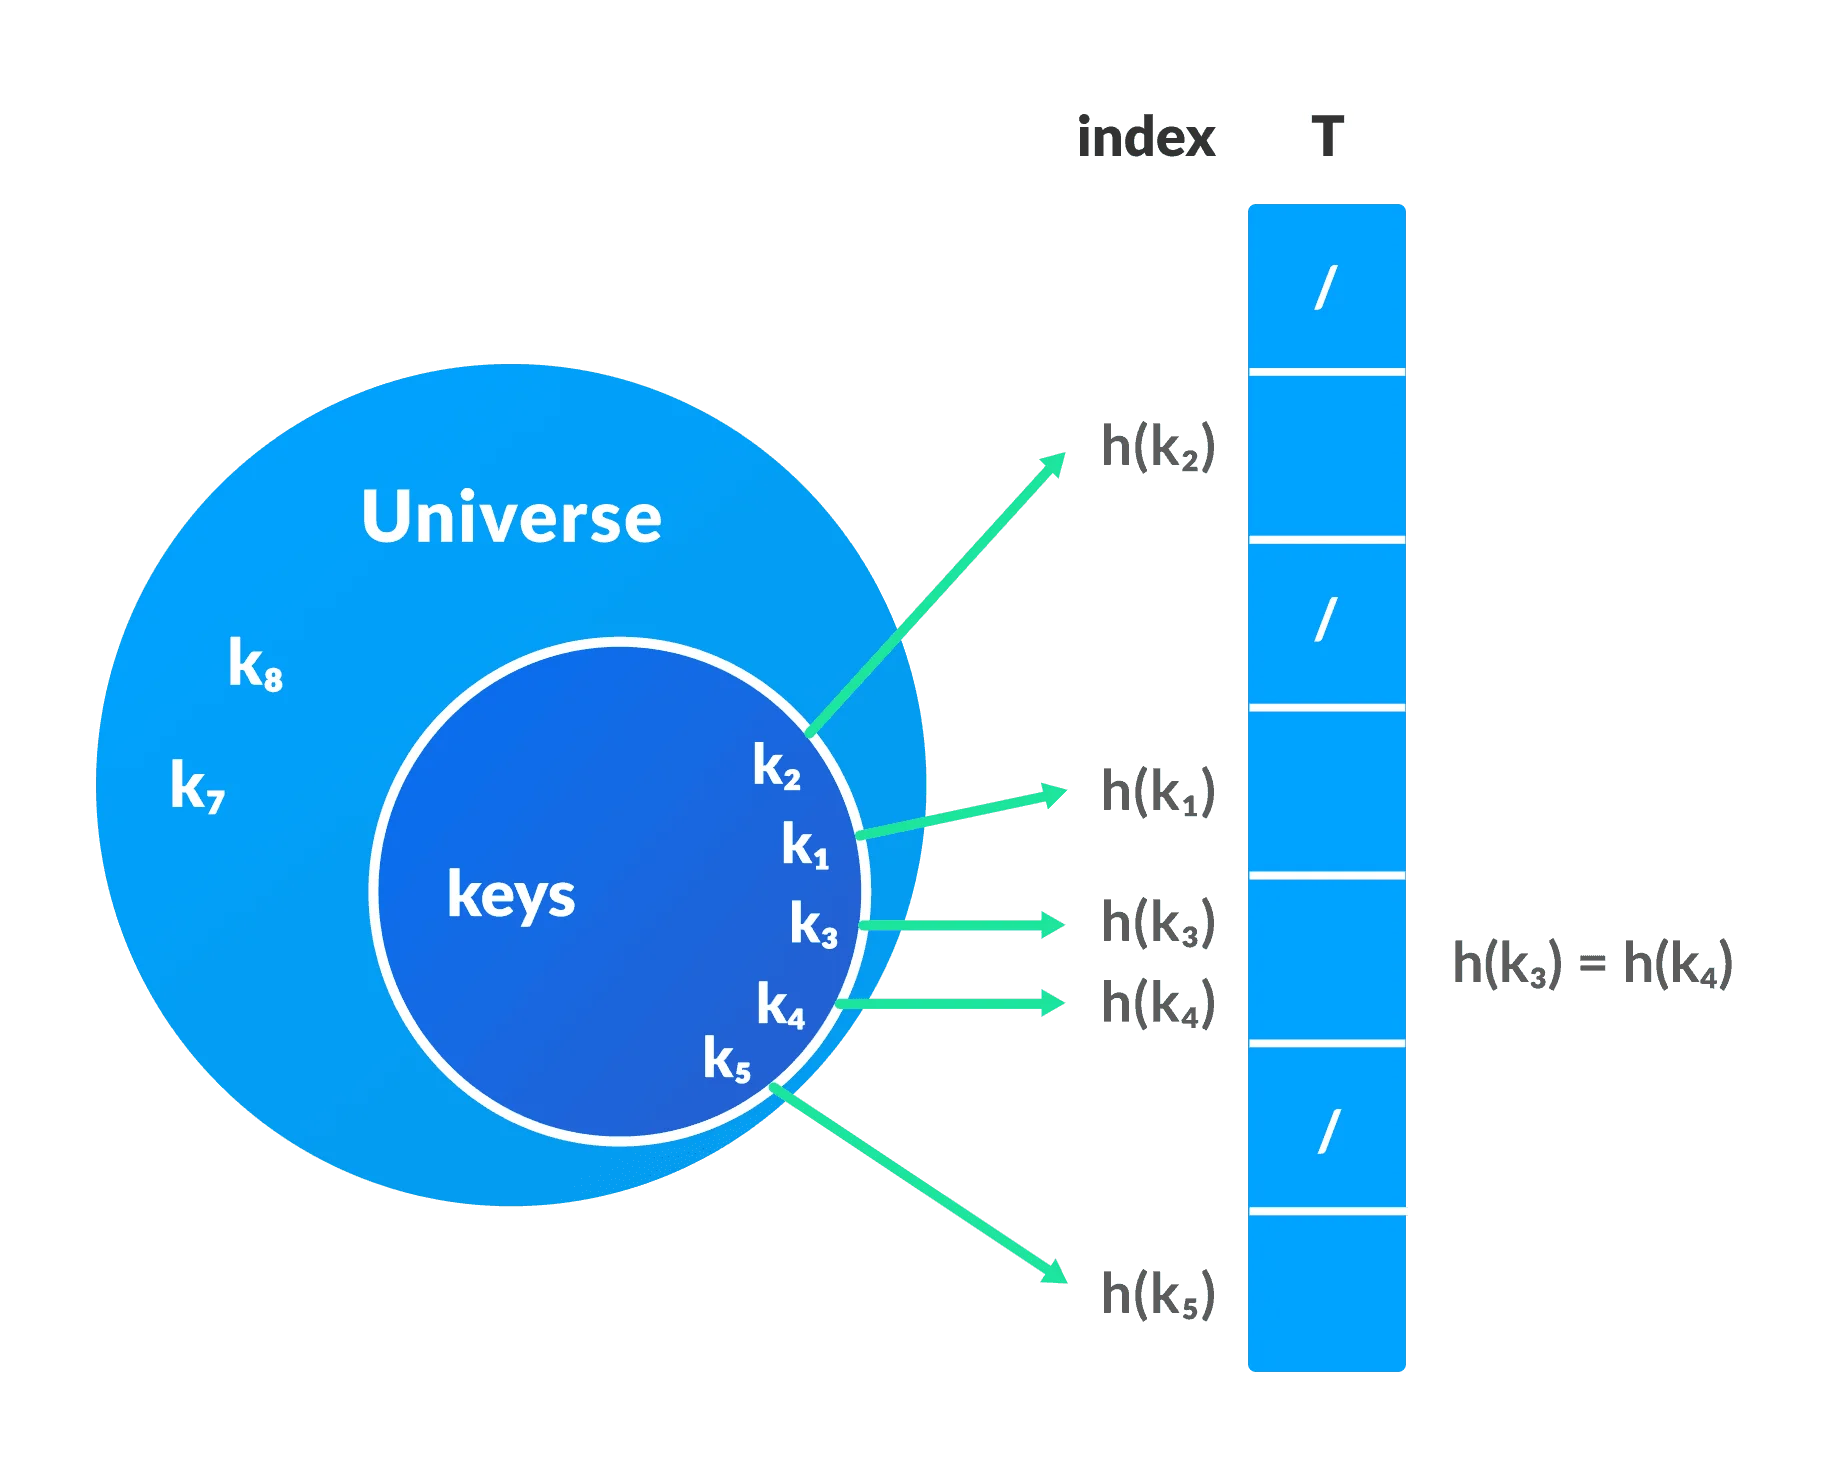

### Hash Çakışması:
Hash fonksiyonu, birden fazla anahtar için aynı dizini oluşturduğunda, bir çakışma olacaktır.<br> (bu indexte hangi değerin depolanacağı ile ilgili). Buna <b> hash çakışması (hash collision)</b> denir.

- <i>Aşağıdaki tekniklerden birini kullanarak hash çakışmasını çözebiliriz:</i>
1. Zincirleme ile çakışması çözümü
2. Açık Adresleme: Doğrusal/Kuadratik Sondalama ve Çift Hashleme

### 1. Zincirleme ile çakışması çözümü:
- Zincirlemede, eğer bir hash fonksiyonu birden fazla eleman için aynı indeksi üretiyorsa,<br>bu elemanlar çift bağlantılı bir liste kullanılarak aynı indekste saklanır.

- j, birden çok öğenin yuvasıysa, öğe listesinin başına bir işaretçi içerir. Hiçbir öğe yoksa, j <b>NIL</b> içerir.

### 2. Açık Adresleme:
- Zincirlemeden farklı olarak, açık adresleme aynı yuvada birden çok öğe depolamaz.<br> Burada her yuva ya tek bir anahtarla doldurulur ya da <b>NIL</b> bırakılır.

- Açık adreslemede kullanılan farklı teknikler şunlardır:
    1. <b>Doğrusal Sondalama:</b> <br>
    &nbsp; - Doğrusal yoklamada, çarpışma bir sonraki yuva kontrol edilerek çözülür.<br>
    &nbsp; <b>h(k, i) = (h′(k) + i) mod m</b><br>
    &nbsp; <b>i = {0, 1, ….}</b><br>
    &nbsp; <b>h'(k) -> yeni hash fonksiyonu</b><br>
  
- h(k, 0)'da bir çarpışma meydana gelirse, h(k, 1) kontrol edilir. Bu şekilde, i'nin değeri doğrusal olarak artırılır.

- Doğrusal sondalama ile ilgili sorun, bitişik yuvalardan oluşan bir kümenin doldurulmasıdır.<br> Yeni bir eleman eklerken, tüm kümenin üzerinden geçilmelidir.<br> Bu, hash tablosundaki işlemleri gerçekleştirmek için gereken süreye eklenir.

    2. <b>İkinci Dereceden Sondalama:</b><br>
    &nbsp;  - Doğrusal problamaya benzer şekilde çalışır,<br> ancak aşağıdaki ilişki kullanılarak yuvalar arasındaki boşluk (birden büyük) artırılır.<br>
    &nbsp;<b>h(k, i) = (h′(k) + c1i + c2i**2) mod m</b><br>
    &nbsp;<b>c1 ve c2 pozitif yardımcı sabitlerdir</b><br>
    &nbsp;<b>i = {0, 1, ….}</b><br>
    
    3. <b>Çift Hashleme:</b><br>
    &nbsp; - Bir hash fonksiyonu, h(k) uygulandıktan sonra bir çarpışma meydana gelirse,<br> sonraki yuvayı bulmak için başka bir hash fonksiyonu hesaplanır.<br>
     &nbsp;<b>h(k, i) = (h1(k) + ih2(k)) mod m</b><br>

- İyi bir hash fonksiyonu çarpışmaları tamamen engellemeyebilir ancak çarpışma sayısını azaltabilir.

- Burada, iyi bir hash fonksiyonu bulmak için farklı yöntemlere bakacağız.

### 1.)Bölme Yöntemi:
- k bir anahtarsa ve m özet tablosunun boyutuysa, hash fonksiyoun h() şu şekilde hesaplanır:<br>
  &nbsp;<b>h(k) = k mod m</b><br>
- Örneğin, bir hash tablosunun boyutu 10 ve k = 112 ise h(k) = 112 mod 10 = 2. m'nin değeri 2'nin kuvvetleri olmamalıdır. Bunun nedeni, ikili formatta 2'nin kuvvetlerinin olmasıdır. 10, 100, 1000, …. k mod m'yi bulduğumuzda, her zaman daha düşük sıralı p-bitlerini alacağız.

### 2.)Çarpma Yöntemi:
- &nbsp;<b>h(k) = ⌊m(kA mod 1)⌋</b><br>
- &nbsp;kA mod 1, kA kesirli kısmını verir.<br>
- &nbsp;⌊ ⌋ taban değerini verir.<br>
- &nbsp;A herhangi bir sabittir. A'nın değeri 0 ile 1 arasındadır. Ancak, Knuth tarafından önerilen en uygun seçim ≈ <b>(√5-1)/2</b> olacaktır.<br>

### 3.) Evrensel Hashing:
- Universal hashing'de hash fonksiyonu anahtarlardan bağımsız olarak rastgele seçilir.


In [11]:
### Pythonda Hast Table Islemi  ###

hashTable = [[],] * 10  # 10 boyutlu bir hash tablosu.

def checkPrime(n):  # Asal mı diye kontrol edilir.
    if n == 1 or n == 0:
        return 0

    for i in range(2, n//2):
        if n % i == 0:
            return 0

    return 1


def getPrime(n):  # Asal sayılar alınır.
    if n % 2 == 0:
        n = n + 1

    while not checkPrime(n):
        n += 2

    return n


def hashFunction(key):  # Hash fonksiyonu tanımlanır.
    capacity = getPrime(10)
    return key % capacity


def insertData(key, data):  # Öğe eklenir.
    index = hashFunction(key)
    hashTable[index] = [key, data]

def removeData(key):  # Öğe çıkarılır.
    index = hashFunction(key)
    hashTable[index] = 0

insertData(123, "apple")
insertData(432, "mango")
insertData(213, "banana")
insertData(654, "guava")

print("Hash Tablosu (Silmeden Önce):\n",hashTable)

removeData(123)

print("Hash Tablosu:(Silmeden Sonra)\n", hashTable)
print("Hash Tablosu'nun Boyutu: ",len(hashTable))

Hash Tablosu (Silmeden Önce):
 [[], [], [123, 'apple'], [432, 'mango'], [213, 'banana'], [654, 'guava'], [], [], [], []]
Hash Tablosu:(Silmeden Sonra)
 [[], [], 0, [432, 'mango'], [213, 'banana'], [654, 'guava'], [], [], [], []]
Hash Tablosu'nun Boyutu:  10
